#**CHAP5.회귀**

##**1.회귀 소개**
  * 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
  * 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭함

  * 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

  * 회귀 유형 구분
    * 독립변수 개수 > 단일 회귀 / 다중 회귀
    * 회귀 계수의 결합 : 선형 회귀 / 비선형 회귀
  
  * 지도학습
    * 분류 : 예측값이 Categorical
    * 회귀 : 예측 값이 연속값

  * 선형 회귀 모형
    * 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화 할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
    * 릿지 : 선형 회귀에 L2 규제를 추가한 회귀 모델. L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
    * 라쏘 : 선형 회귀에 L1 규제를 적용한 방식. L2 규제가 회귀 계수 값의 크기를 줄이는데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
    * 엘라스틱넷 : L2,L1 규제를 함께 결합한 모델. 주로 피처가
    * 로지스틱 회귀 : 분류에 사용되는 선형 모델

##**2. 단순 선형 회귀를 통한 회귀 이해**

* 단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀

* 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류값
  * 최적의 회귀 모델 : 잔차의 합이 최소가 되는 모델

* RSS : 잔차 제곱 합
  * RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항임.
  * 회귀에서 RSS는 비용이며 회귀 계수로 구성되는 RSS를 비용 함수라고 함.

##**3.비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

  * 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화 하는 방법을 직관적으로 제공
  * 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식
  * 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W파라미터를 지속해서 보정해 나감(W 파라미터를 업데이트)
  * 최초 W에서부터 미분을 적용한 뒤 미분 값이 계속 감소하는 방향으로 순차적으로 W를 업데이트 > 미분된 1차함수의 기울기가 감소하지 않는 지점을 비용함수가 최저인 지점으로 간주하고 그때의 w를 반환

  * 경사하강법의 일반적인 프로세스
    * STEP1 : w1,w2를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
    * STEP2 : 업데이트 된 w = 이전 w - 학습률*편미분값
    * SETP3 : 비용 함수의 값이 감소했으면 다시 STEP2 반복, 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w1,w2를 구하고 반복을 중지


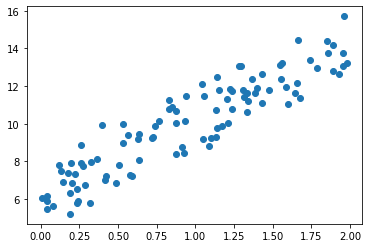

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4x+6 을 근사 (w1=4,w0=6). 임의의 값은 노이즈를 위해 만듦
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

* 비용 함수 정의

In [3]:

def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

* gradient_descent() : 경사 하강법 구현

In [4]:
#w1과 w0을 업데이트할 w1_update,w0_update를 반환

def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  #먼저 w1_updeat, w0_update를 각각 w1,w0의 shpae와 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w2_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))

  #w1과 w0을 업데이트할 w1_update 와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update,w0_update

In [5]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트

def gradient_descent_steps(X,y, iters=10000):
  #w0과 w1을 모두 0으로 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

* gradient_descent_steps()를 호출해 w1과 w0구하기

* 최종적으로 RSS를 계산하는 get_cost() 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산

In [6]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost


w1,w0=gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))


w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


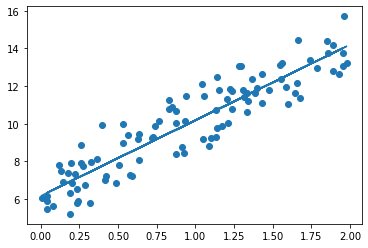

In [7]:
plt.scatter(X,y)
plt.plot(X,y_pred)

> 경사하강법을 통해 회귀선이 잘 만들어 짐

* 확률적 경사 하강법 : Stochastic Gradient Descent
  * 경사하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림
  * 일부 데이터만 이용해 w가 업데이트 되는 값을 계산함

* stochastic_gradietn_descent_steps()
  * (미니배치)확률적 경사 하강법

In [8]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [9]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


* 피처가 M개인 경우 회귀 계수 M+1개 > 선형대수로 계산

##**4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

###1) LinearRegression 클래스 - Ordinary Least Squares

* LinearRegression 클래스는 예측값과 실제 값의 RSS 를 최소화해 OLS 추정 방식으로 구현한 클래스

* fit() 메서드로 X,y 배열을 입력받으면 회귀 계수인 W를 coef_속성에 저장함

* 입력 파라미터 
  * fit_intercept : 불린 값, 디폴트 True. intercept 값을 계산할 것인지 아닌지를 지정
    * False 이면 절편 0
  * normalize : 회귀를 수행하기 전에 입력 데이터 세트를 정규화 할 것 인지

* 속성
  * coef_ : fit()메서드를 수행했을 때 회귀 계수가 배열 형태로 저장
  * intercept_ : intercept 값

* 다중공선성 문제
  * 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐
  * 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용


###2) 회귀 평가 지표

* MAE (Mean Absolute Error)
  * 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균
  * metrics.mean_absolute_error
  * scoring 함수 적용 값 : neg_mean_absolute_error
* MSE(Mean Sqaured Error)
  * 실제 값과 예측 값의 차이를 제곱해 평균
  * metrics.mean_squared_error
  * scoring 함수 적용 값 : neg_mean_sqaured_error
* RMSE
  * MSE는 오류의 제곱을 구하므로 실제 오류 평균보다 더 커짐 > MSE에 루트
* R^2
  * 분산 기반으로 예측성능을 평가
  * 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하여 1에 가까울수록 예측 정확도가 높음
  * metrics.r2_score
  * scoring 함수 적용값 : r2_score

* Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하는데, MAE와 MSE는 클수록 좋지 않은 것이므로 neg를 붙여 음수값으로 만들어 줌 > 작은 오류값이 더 큰 숫자로 인식
  * 값이 커질수록 나쁜 모델임


###3) LinearRegression을 이용해 보스턴 주택 가격 회귀 구현


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


In [11]:
#boston 데이터 세트 로드
boston=load_boston()

#boston 데이터 세트 DataFrame 변환
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* regplot()
  * X,Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌

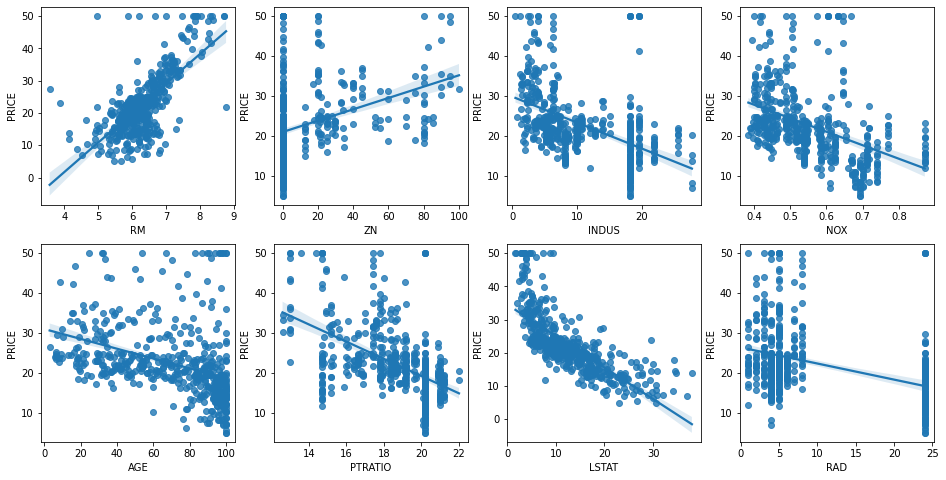

In [12]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs 는 4*2개의 ax를 가짐
fig, axs=plt.subplots(figsize=(16,8),ncols=4, nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

* Linear Regression 클래스를 이용해 보스턴 주택 가격 회귀 모델 만들기

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE :{0:.3f}, RMSE :{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE :17.297, RMSE :4.159
Variance score : 0.757


In [14]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_,1))

절편 값 :  40.995595172164755
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


* coef_ 를 피처별 회귀 계수 값으로 다시 매핑하고 높은 값 순으로 출력

In [15]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

* 5개의 폴드 세트에서 교차 검증으로 MSE와 RMSE를 측정
  * corss_val_score()는 RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야 함

In [16]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
lr=LinearRegression()

#corss_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores=cross_val_score(lr,X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

#corss_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores :',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


##**5. 다항 회귀와 과(대)적합/과소적합 이해**

* 다항 회귀 : 회귀가 독립 변순의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

* 다항 회귀는 선형 회귀
  * 회귀에서 선형/비선형회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관함

* 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음
  * 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현함
  * PolynomialFeatures : degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환함
  

In [17]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


* 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측

In [18]:
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 곘루 feature:\n',X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 곘루 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


* 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현됨

In [19]:
from sklearn.linear_model import LinearRegression
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape :',model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


> 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어남

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=model.fit(X,y)
print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


###1) 다항 회귀를 이용한 괄소적합 및 과적합 이해

* 다항 회귀의 차수를 높이면 피처의 직선적 관계가 아닌 복잡한 다항 관계 모델링 가능
* 다항 회귀의 차수가 높아질수록 학습 데이터에만 너무 맞춘 학습이이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측정확도가 떨어짐



* 원래 데이터 세트는 피처 X와 target y가 노이즈가 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어줌

* 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더한 값
y=true_fun(X)+np.random.randn(n_samples)*0.1



* 예측 결과를 비교할 다항식 차수를 각각 1,4,15로 변경하면서 예측 결과를 비교


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.043208749872320706 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]입니다.
Degree 15 MSE는 180526263.3177066 입니다.


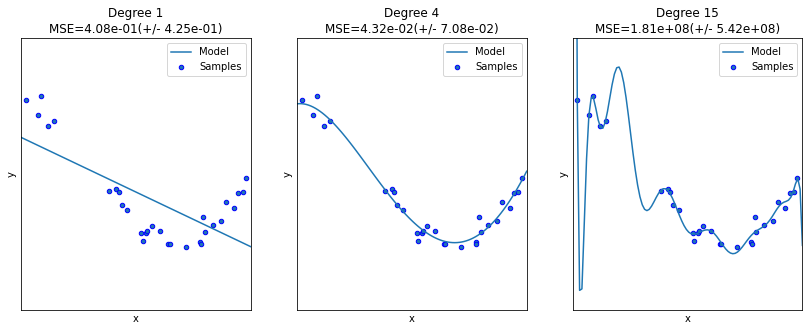

In [22]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

#다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax=plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())

  #개별 degree별로 Polynomial 변환
  polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([('polynomial_featrues',polynomial_features),
                     ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가
  scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named_seps['객체명']을 이용해 회귀 계수 추출
  coefficients=pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i],np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
  #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test=np.linspace(0,1,100)
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
  plt.scatter(X,y,edgecolor='b',s=20,label="Samples")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i],-scores.mean(),scores.std()))

plt.show()



> 맨왼쪽의 Degree1 예측 곡선은 단순한 직선으로 단순 선형 회귀와 같음. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보임

> 두번째 Degree4 예측 곡선은 실제 데이터 세트와 유사한 모습

> 세번째 Degree15 예측 곡선은 MSE값이 매우 큼 (과적합)

###2) 편향-분산 트레이드 오프 (Bias-Variance Trade off)

* 고편향 : 매우 단순화된 모델로서 지나치게 한 반향성으로 치우침

* 고분산 : 매우 복잡한 모델로서 지나치게 높은 변동성을 가짐

* 저편향/저분산 : 예측 겨로가가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중됨

* 저편향/고분산 : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포되어 있음

* 고편향/저분산 : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중됨

* 고편향/고분산 : 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포됨

* 일반적으로 편향과 분산은 한 쪽이 높으면 한쪽이 낮아지는 경향

* 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 골디락스 지점 > 이후로 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능은 다시 저하됨

* 고편향/저분산에서 과소적합되기 쉬우며 저편향/고분산에서 과적합되기 쉬움

* 편향과 분산이 서로 트레이트오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법.

##**6. 규제 선형 모델 - 릿지, 라소, 엘라스틱넷**

###1) 규제 선형 모델의 개요

* 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는것을 제어할 수 있어야 함

* RSS를 줄이는 것에만 초점을 둔 기존 선형모델의 비용함수는 학습 데이터에 지나치게 맞추게 됨

* 비용함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함

* 회귀 계수의 크기를 제어해 과적합을 개선하려면 비용 함수의 목표가 다음과 같이 RSS(W)+alpha*||W||를 최소화 하는것으로 변경될 수 있음
  * alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있음.
  * alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있음

* 규제 : 비용 함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
  * L2 규제 : alpha*||W||^2와 같이 W의 제곱에 대해 패널티를 부여하는 방식, 릿지 회귀
  * L1 규제 : alpha*||W|| 와 같이 W의 절댓값에 대해 패널티를 부여하는방식 , 라쏘 회귀
    * L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환함

    




###2) 릿지 회귀

* Ridge 클래스를 통해 릿지 회귀를 구현함.


In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지 회귀 수행
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)
print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores,3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))



5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE : 5.518


> 규제가 없는 LinearRegression보다 더 뛰어난 예측성능

In [30]:
#릿지에 사용될 alpha 파라미터 값을 정의
alphas=[0,0.1,1,10,100]

#alpha list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
  ridge=Ridge(alpha=alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores=cross_val_score(ridge,X_data, y_target, scoring="neg_mean_squared_error",cv=5)
  avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse) )                                                 

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


* alpha 값의변화에 따른 피처의 회귀계수값을 가로 막대 그래프로 시각화

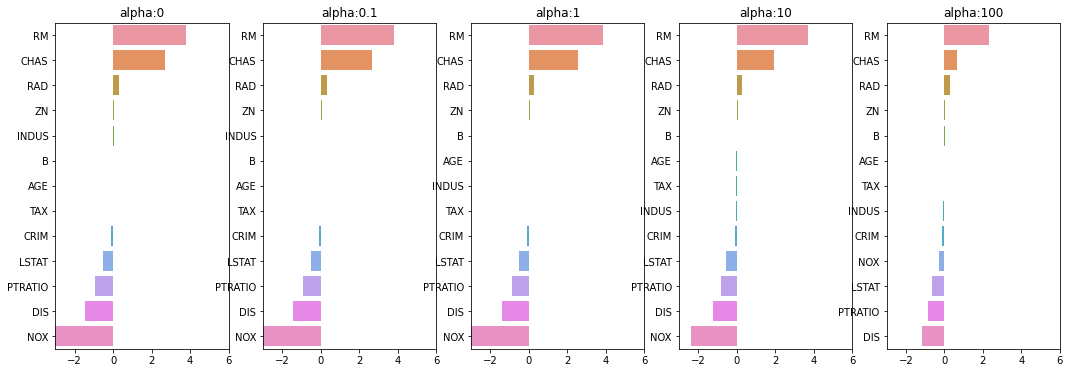

In [42]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig,axs=plt.subplots(figsize=(18,6),nrows=1,ncols=5)
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df=pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의위치 지정
for pos, alpha in enumerate(alphas):
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_data,y_target)
  #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff=pd.Series(data=ridge.coef_, index=X_data.columns)
  colname='alpha:'+str(alpha)
  coeff_df[colname]=coeff
  #막대 그래프로 각 alpha 값에서의 회귀계수를 시각화. 회귀 계수 값이 높은 순으로 표현
  coeff=coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

#for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()


* alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐

In [43]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


###3) 라쏘 회귀

* W의 절댓값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것

* 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거함 > 적절한 피처만 회귀에 포함시키는 피처 선택의 특성

* Lasso 클래스로 라쏘 회귀 구현

In [53]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 변환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df=pd.DataFrame()
  if verbose : print('###### ', model_name, '######')
  for param in params:
    if model_name=='Ridge': model = Ridge(alpha=param)
    elif model_name=='Lasso':model=Lasso(alpha=param)
    elif model_name=='ElasticNet':model= ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores=cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error",cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5폴드 세트의 평균 RMSE:{1:.3f}'.format(param,avg_rmse))
    #corss_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)
    #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff=pd.Series(data=model.coef_, index=X_data.columns)
    colname='alpha:'+str(param)
    coeff_df[colname]=coeff
  return coeff_df


In [48]:
#라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data, y_target_n=y_target)


######  Lasso ######
alpha 0.07일 때 5폴드 세트의 평균 RMSE:5.612
alpha 0.1일 때 5폴드 세트의 평균 RMSE:5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE:5.669
alpha 1일 때 5폴드 세트의 평균 RMSE:5.776
alpha 3일 때 5폴드 세트의 평균 RMSE:6.189


> 릿지 평균보다는 떨어지지만 LinearRegression 보다는 좋은 성능을 가짐

In [50]:
# 반환된 coeff_lasso_df 를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


> alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀜

###4) 엘라스틱넷 회귀


* L2규제와 L1규제를 결합한 회귀
* 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 주용 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강함. > alpha 값에 따라 회귀 계수의 값이 급격히 변동 > 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가

* 수행 시간이 상대적으로 오래 걸림

* ElasticNet 클래스로 구현
  * alpha=a(=L1의 alpha)+b(=L2의 alpha)
  * L1_ratio=a/(a+b)

In [54]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet',params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07일 때 5폴드 세트의 평균 RMSE:5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE:5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE:5.467
alpha 1일 때 5폴드 세트의 평균 RMSE:5.597
alpha 3일 때 5폴드 세트의 평균 RMSE:6.068


In [55]:
# 반환된 coeff_elastic_df를 첫번째 칼럼 순으로 내림차순 정렬해 회귀 계수 DataFrame 출력
sort_column='alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


* 릿지, 라쏘, 엘라스틱넷 중 어느것이 가장 좋을지는 상황마다 다름 > 각각의 알고리즘에서 하이퍼 파라미터를 변경해 가면서 최적의 예측 성능을 찾아내야 함

###5) 선형 회귀 모델을 위한 데이터 변환

* 선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고, 이러한 최적의 선형함수를 찾아내 결괏값을 예측함

* 피처값과 타깃값의 분포가 정규분포 형태인 것을 매우 선호함

* 타깃값의 경우 특정 값의 분포가 치우친 skewed 된 형태의 분포일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높음

* 따라서 일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우 선형 회귀 모델을 적용하기 전에 데이터에 대한 스케일링/ 정규화 작업을 수행

* 피처 데이터 세트의 스케일링/정규화
  * StandardScaler 클래스를 이용, MinMaxScaler 클래스 이용
  * 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환
  * 원래 값에 log 함수를 적용하면 보다 정규분포에 가까운 형태로 값이 분포됨

* 타깃 값의 스케일링/정규화 : 로그 변환

In [71]:
#로그 변환에서 np.log()함수를 사용하면 언더플로우가 발생하기 쉬워 1+log() 함수를 사용함 > np.log1p()

#method는 표준 정규 분포 변환(standard), 최댓값/최숫값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method=='Standard':
    scaled_data=StandardScaler().fit_transform(input_data)
  elif method=='MinMax':
    scaled_data=MinMaxScaler().fit_transform(input_data)
  elif method=='Log':
      scaled_data=np.log1p(input_data)
  else:
      scaled_data=input_data

  if p_degree !=None:
      scaled_data=PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
  return scaled_data

* Ridge 클래스의 alpha 값을 변화시키면서 피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력 받을 경우에 RMSE 값이 어떻게 변하는지 살펴봄

* 피처 데이터의 변환 방법
  * None : 원본 데이터 
  * Standard,None : 표준 정규 분포
  * Standard,2 : 표준 정규분포를 다시 2차 다항식 변환
  * MinMax,None : 최솟값/최댓값 정규화
  * MinMax,2 : 최솟값/최댓값 정규화를다시 2차 다항식 변환
  * Log,None : 로그 변환

In [72]:
#Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas=[0.1,1,10,100]

#5개 방식으로 변환.
scale_methods=[(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]

for scale_method in scale_methods:
  X_data_scaled=get_scaled_data(method=scale_method[0],p_degree=scale_method[1], input_data=X_data)
  print('\n## 변환유형:{0},Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge',params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환유형:None,Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE:5.788
alpha 1일 때 5폴드 세트의 평균 RMSE:5.653
alpha 10일 때 5폴드 세트의 평균 RMSE:5.518
alpha 100일 때 5폴드 세트의 평균 RMSE:5.330

## 변환유형:Standard,Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE:5.826
alpha 1일 때 5폴드 세트의 평균 RMSE:5.803
alpha 10일 때 5폴드 세트의 평균 RMSE:5.637
alpha 100일 때 5폴드 세트의 평균 RMSE:5.421

## 변환유형:Standard,Polynomial Degree:2
alpha 0.1일 때 5폴드 세트의 평균 RMSE:8.827
alpha 1일 때 5폴드 세트의 평균 RMSE:6.871
alpha 10일 때 5폴드 세트의 평균 RMSE:5.485
alpha 100일 때 5폴드 세트의 평균 RMSE:4.634

## 변환유형:MinMax,Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE:5.764
alpha 1일 때 5폴드 세트의 평균 RMSE:5.465
alpha 10일 때 5폴드 세트의 평균 RMSE:5.754
alpha 100일 때 5폴드 세트의 평균 RMSE:7.635

## 변환유형:MinMax,Polynomial Degree:2
alpha 0.1일 때 5폴드 세트의 평균 RMSE:5.298
alpha 1일 때 5폴드 세트의 평균 RMSE:4.323
alpha 10일 때 5폴드 세트의 평균 RMSE:5.185
alpha 100일 때 5폴드 세트의 평균 RMSE:6.538

## 변환유형:Log,Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE:4.770
alpha 1일 때 5폴드 세트의 평균 RMSE:4.676
alpha 10일 때 5폴드 세트의 

> 표준 정규 분포와 최솟값/최댓값 정규화로 피처 데이터 세트를 변경해도 성능상의 개선은 없음

> 표준 정규분포로 일차 변환 후 2차 다항식 변환을 했을 때 성능 개선

> 최솟값/최댓값 정규화로 일차 변환 후 2차 다항식 변환 했을 때 성능 개선

> 다항식 변환은 피처의 개수가 많을 경우 적용하기 함들고 데이터 건수가 많아지면 계산에 많은 시간이 소모됨

> 로그 변환은 모두 성능 개선

##**7. 로지스틱 회귀**

* 로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘 > 분류에 사용됨

* 선형 회귀 계열
  * 회귀의 선형/비선형 여부는 가중치 변수가 선형인지 아닌지가 기준

* 로지스틱 회귀는 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정 함

* 위스콘신 유방함 데이터 세트를 이용해 로지스틱 회귀 > 암 여부 판단
  * 종양의 크기에 따라 악성 종양인지 아닌지를 회귀를 이용해 1과 0의 값으로 예측 
  * 종양 크기에 따라 악성이 될 확률이 높다고 하면 시그모이드 함수를 이용하여 분류를 수행 할 수있음

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test=train_test_split(data_scaled, cancer.target,test_size=0.3, random_state=0)

In [78]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds=lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy:{:0.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc:{:0.3f}'.format(roc_auc_score(y_test,lr_preds)))


accuracy:0.977
roc_auc:0.972


* LogisticRegression 하이퍼 파라미터 최적화
  * penalty
    * l2 : L2 규제 (default)
    * l1 : L1 규제
  * C : 1/alpha

In [80]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2','l1'], 'C':[0.01,0.1,1,1,5,10]}

grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 :0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

* 로지스틱 회귀는 가볍고 빠르지만 이진 분류 예측 성능도 뛰어나 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많음

##**8. 회귀 트리**


* 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀방식

* 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측

* 회귀트리는 리프 노드에 속한 데이터 값의 평균 값을 구해 회귀 예측값을 계산함

* 리프 노드 생성 기준에 부합하는 트리 분할이 완료됐다면 리프 노드에 소소된 데이터 값의 평균값을 구해서 리프 노드에 결정 값으로 할당함

* 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등 모든 트리 기반 알고리즘은 트리 생성이 CART 알고리즘에 기반하고 있기 때문에 회귀도 가능

* RandomForestRegressor를 이용해 보스턴 주택 가격 예측

In [82]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#보스턴 데이터 세트 로드
boston=load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE']=boston.target
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)

rf=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf,X_data, y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 교차 검증의 개별 negative MSE scores : ',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores :', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

5 교차 검증의 개별 negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [83]:
def get_model_cv_prediction(model,X_data, y_target):
  neg_mse_scores=cross_val_score(model,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
  rmse_Scores=np.sqrt(-1* neg_mse_scores)
  avg_rmse=np.mean(rmse_scores)
  print('#### ', model.__class__.__name__, ' ####')
  print('5교차 검증의 평균 RMSE :{0:.3f}'.format(avg_rmse))

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

#트리 기반의 호귀 모델을 반복하면서 평가 수행
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model,X_data,y_target)


####  DecisionTreeRegressor  ####
5교차 검증의 평균 RMSE :4.423
####  RandomForestRegressor  ####
5교차 검증의 평균 RMSE :4.423
####  GradientBoostingRegressor  ####
5교차 검증의 평균 RMSE :4.423
[07:03:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
####  XGBRegressor  ####
5교차 검증의 평균 RMSE :4.423
####  LGBMRegressor  ####
5교차 검증의 평균 RMSE :4.423


*  회귀 트리 Regressor 클래스는 회귀계수를 제공하는 coef_ 속성 없음. 대신 피처 중요도 시각화 가능

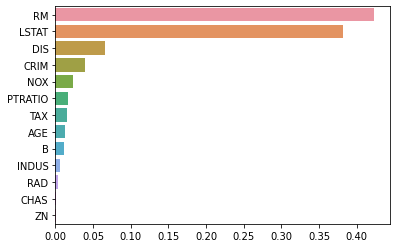

In [88]:
import seaborn as sns
%matplotlib inline

rf_reg=RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data,y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

* 회귀 트리 Regressor가 어떻게 예측 값을 판단하는지 선형 회귀와 비교해 시각화
  * 2차원 평면상에서 회귀 예측선을 쉽게 표현하기 위해 단 1개의 변수만 추출.

(100, 2)


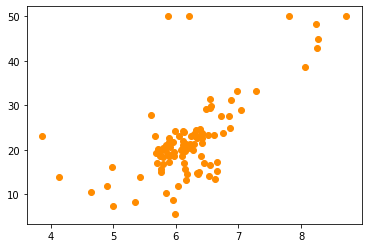

In [90]:
bostonDF_sample=bostonDF[['RM','PRICE']]
bostonDF_sample=bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE,c='darkorange')

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2,7
lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5 까지의 100게 데이터 세트로 생성
X_test=np.arange(4.5,8.5,0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature=bostonDF_sample['RM'].values.reshape(-1,1)
y_target=bostonDF_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행
lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

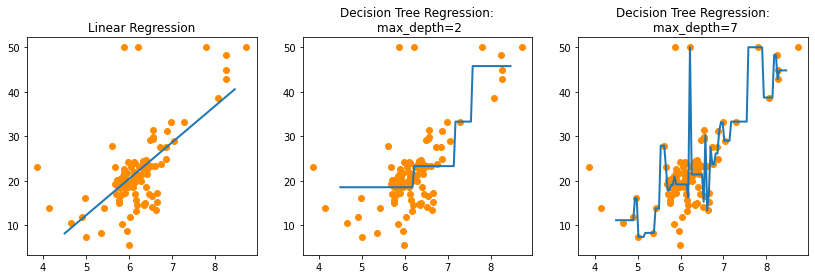

In [94]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(14,4),ncols=3)

# X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE,c='darkorange')
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

#DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression:\n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE,c='darkorange')
ax2.plot(X_test, pred_rf2, label="max_depth=2", linewidth=2)

#DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression:\n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE,c='darkorange')
ax3.plot(X_test, pred_rf7, label="max_depth=3", linewidth=2)

> 선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해, 회귀트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만듦.

> max_depth=7 인 경우 학습 데이터 세트의이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합됨